In [5]:
# The Callable is any object that can be called (funct, method, class)
from typing import List, Tuple, Dict, Union, Callable
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Construct a function which iterates the logistic equation

In [2]:
from src.utils import logistic_eq_iterator

In [3]:
logistic_eq_iterator(3.9999, 0.1, 40)

[0.1,
 0.359991,
 0.9215668799,
 0.2891182349,
 0.8220949717,
 0.5850046913,
 0.9710725324,
 0.1123598678,
 0.3989305381,
 0.959115877,
 0.1568465247,
 0.528969545,
 0.9966181458,
 0.013481332,
 0.0531970128,
 0.2014633258,
 0.643487329,
 0.9176226045,
 0.3023578817,
 0.8437292785,
 0.5273875474,
 0.996974764,
 0.0120640342,
 0.0476727813,
 0.1815958089,
 0.5944602225,
 0.9642849577,
 0.1377544683,
 0.4751008212,
 0.9974951856,
 0.0099939114,
 0.0395751431,
 0.1520320037,
 0.5156602024,
 0.9989940568,
 0.0040196246,
 0.0160134685,
 0.0630265736,
 0.2362109931,
 0.7216433978]

Construct a function which plots the orbit of the logistic equation

In [4]:
def plot_logistic_eq(r_value:float, seed: Union[float, int], iterations = int):

    # Call the function that calculates the orbit
    orbit = logistic_eq_iterator(r_value, seed, iterations)
    
    # Create the plot
    plt.plot(np.arange(1,iterations+1,1), orbit)
    plt.show()


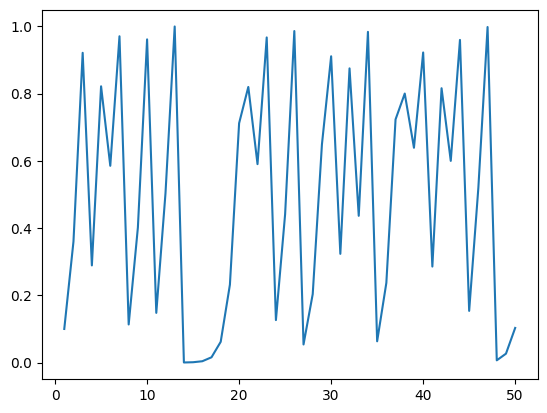

In [5]:
plot_logistic_eq(4, 0.1, 50)

### Constructing the Euler's method for solving Differential equations

In [6]:
# Create the differential equation we are about to solve.
# In this case, we are solving the Newton's Law of Cooling
# dT(t)/dt = k(Tr - T(t)); where k is a constant that models how
# the object exchange heat with the environment; T(t) is
# the temperature at time t (this is the parameter that controls
# the initial conditions of the system). And Tr is the temperature 
# of the environment.

def differential_eq(k, Tr, variable_magnitude):
    """

    Args:
    -------
        variable_magnitude: float
            The variable magnitude of the differential equation.
            This can also be interpreted as the initial condition.  
    """
    T = variable_magnitude
    return k*(Tr - T)

In [ ]:
# Function for applying the Euler's method to solve the differential equation
def euler_method(differential_eq: Callable, delta, iterations, *args, **kwargs):
    """
    This is the Euler's method for solving differential equations.
    Args:
    -------
        differential_eq: Callable (function, method, class)
            The differential equation to solve
        delta: float
            This is the step size for the Euler's method. this
            is the size of the interval we assume the differential
            equation is constant.
        *args: Tuple
            The arguments needed for the differential equation.
        **kwargs: Dict
            The positional arguments needed for the differential equation.

    Returns: DataFrame
    -------
        A pandas DataFrame with the results of the Euler's method.
        The DataFrame contains the iteration number and the variable magnitude
        of the differential equation.

    Algorithm:
        Steps of the Eulers method:

        1. Calculate the rate of change of the process. 
        Here we need to replace into the differential equation 
        the variable value, so we know the rate of change. 

        2. Then, we need to sum/substract the rate of change to the 
        variable value, but before that, we need to multiply the 
        rate of change by the delta. 
            e.j. Suppose our rate of change is 2°c/min, and our delta 
            is 2min, so, to know the temperature after 2 minutes, we 
            need to multiply the 2°c/min rate of change, by the delta 2min. 

        3. The step 2 gives us the new magnitude after our delta. 
            e.j. In our case, we know the temperature after 2 minutes.

        4. After we have the new magnitude, just repeat te process
        from the first step of this algorithm.
    """

    
    # Accessing to the Kwargs dictionary to extract the 
    # variable magnitude, so we can apply the Euler's method.
    # The **Kwargs is a dictionary that contains all the
    # positional arguments and can be accessed by the key.
    variable_magnitude = kwargs['variable_magnitude']

    results = []

    for i in range(iterations):
        results.append(variable_magnitude)

        rate_of_change = differential_eq(*args, variable_magnitude)

        # Calculating new variable magnitude
        variable_magnitude = round((rate_of_change * delta) + variable_magnitude, 5)

    df_result = pd.DataFrame(data={
        "iteration": np.arange(0, iterations, 1),
        "variable_magnitude": results
    })


    return df_result

In [16]:
data = euler_method(differential_eq, 1, 20, 0.2, 20, variable_magnitude=80)

In [17]:
data.head()

,iteration,variable_magnitude
0,0,80.000
1,1,68.000
2,2,58.400
3,3,50.720
4,4,44.576


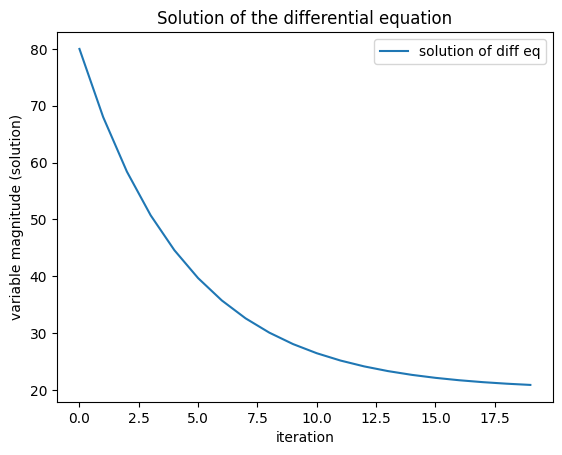

In [18]:
# Create a figure and an axes object
fig, ax = plt.subplots()

# Plotting the data
ax.plot(data.iteration, data.variable_magnitude, label="solution of diff eq")

# Add labels and title
ax.set_xlabel('iteration')
ax.set_ylabel('variable magnitude (solution)')
ax.set_title('Solution of the differential equation')

# Add a legend
ax.legend()

# Show the plot
plt.show()